In [2]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

In [3]:
# Search for your target using its TIC ID 
TIC = 'TIC 180672438' 

In [4]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC);

In [5]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 49,2022,SPOC,120,180672438,0.0
1,TESS Sector 22,2020,TESS-SPOC,1800,180672438,0.0
2,TESS Sector 49,2022,TESS-SPOC,600,180672438,0.0
3,TESS Sector 22,2020,QLP,1800,180672438,0.0
4,TESS Sector 23,2020,QLP,1800,180672438,0.0
5,TESS Sector 49,2022,QLP,600,180672438,0.0


In [6]:
# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=49, author="SPOC")
sector1b = search_result.download_all()
sector1 = sector1b.stitch().remove_nans()

# Search for and download the light curve3
search_result = lk.search_lightcurve(TIC, sector=22,author="QLP")
sector2b = search_result.download_all()
sector2 = sector2b.stitch().remove_nans()

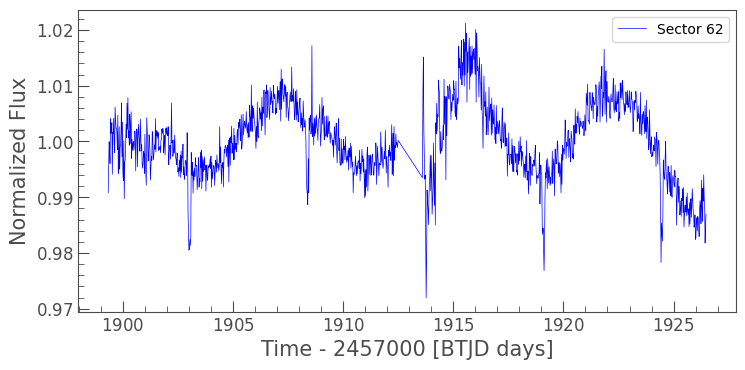

In [8]:
# Plot the light curves with the desired colors and highlighted sectors
ax =sector2.plot(label='Sector 62', color='blue');
%matplotlib inline
ax.legend();

In [9]:
collect_lc = lk.LightCurveCollection([sector1]).stitch();

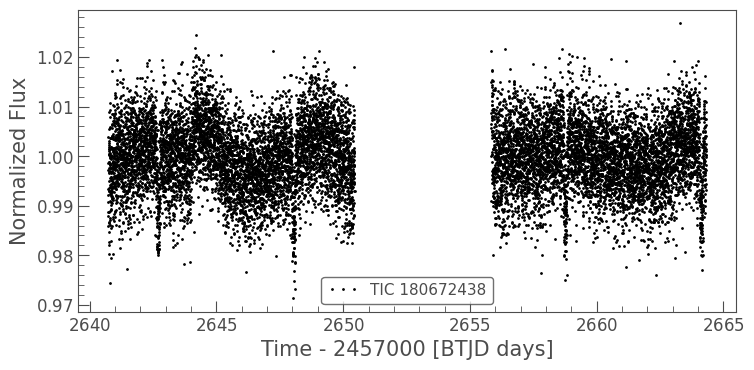

In [10]:
collect_lc.plot(color = 'black', lw = 0, marker = '.');

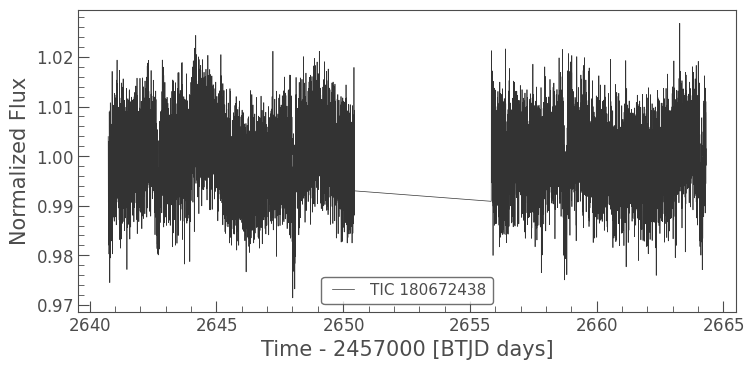

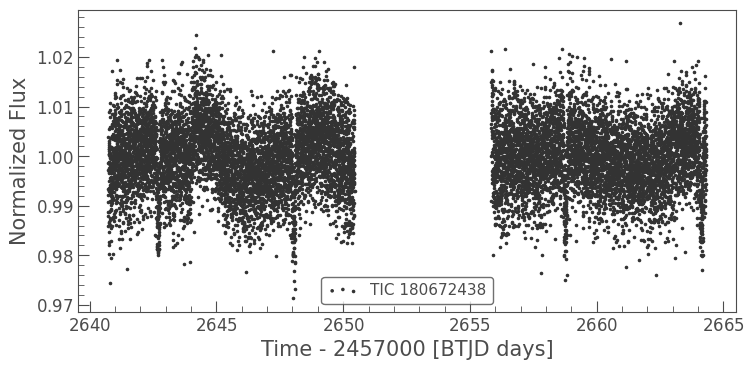

In [11]:
mask = (collect_lc.time.value < 3100)&(collect_lc.time.value > 1)
masked_lc=collect_lc[mask];
masked_lc.plot();
masked_lc.scatter(s=10);


In [12]:
#Querying if there is a solar system object in the first half
df_sso1 = masked_lc.query_solar_system_objects(cadence_mask=(masked_lc.time.value >= 3500) & (masked_lc.time.value <= 1)) 
print(df_sso1)

None


Period at max power = 5.348148148148149 d
BLS max power = 7.182208269213898
Epoch = 2642.711865255952
----------------------------------------
Period at second max power = 2.6814814814814816 d
BLS max power = 4.788330111947491
Epoch = 2642.6768652559517
----------------------------------------
Period at third max power = 5.377777777777778 d
BLS max power = 12.806817565129291
Epoch = 2642.646865255952
----------------------------------------
Period at fourth max power = 16.074074074074073 d
BLS max power = 38.06813110628983
Epoch = 2648.056865255952
----------------------------------------
Period at fifth max power = 16.103703703703705 d
BLS max power = 9.274011649696849
Epoch = 2648.036865255952
----------------------------------------
Period at sixth max power = 10.711111111111112 d
BLS max power = 12.094577718242773
Epoch = 2648.0518652559517
----------------------------------------
Period at seventh max power = 10.740740740740742 d
BLS max power = 71.48184730018706
Epoch = 2648.0318

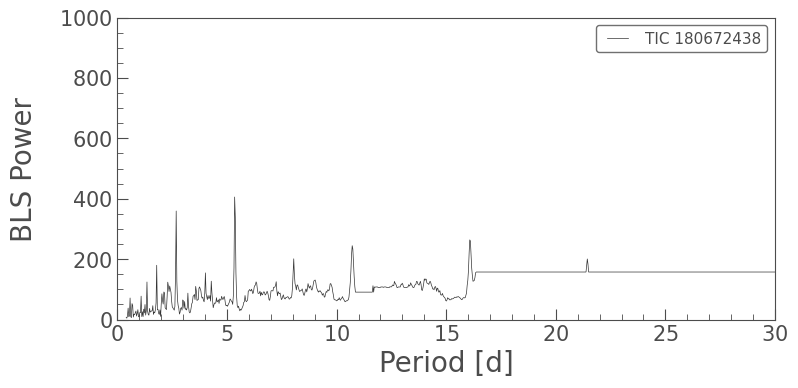

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 1000)
bls = masked_lc.to_periodogram(method='bls', period=period)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.ylim([0, 1000])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
epoch = bls.transit_time
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_epoch = epoch[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
#Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
print('Period at max power =', periods[np.argmax(powers)])
print('BLS max power =', np.max(powers[0]))
print('Epoch =', sorted_epoch[0])
print('----------------------------------------')
print('Period at second max power =', sorted_periods[1])
print('BLS max power =', np.max(powers[1]))
print('Epoch =', sorted_epoch[1])
print('----------------------------------------')
print('Period at third max power =', sorted_periods[2])
print('BLS max power =', np.max(powers[2]))
print('Epoch =', sorted_epoch[2])
print('----------------------------------------')
print('Period at fourth max power =', sorted_periods[3])
print('BLS max power =', np.max(powers[3]))
print('Epoch =', sorted_epoch[3])
print('----------------------------------------')
print('Period at fifth max power =', sorted_periods[4])
print('BLS max power =', np.max(powers[4]))
print('Epoch =', sorted_epoch[4])
print('----------------------------------------')
print('Period at sixth max power =', sorted_periods[5])
print('BLS max power =', np.max(powers[5]))
print('Epoch =', sorted_epoch[5])
print('----------------------------------------')
print('Period at seventh max power =', sorted_periods[6])
print('BLS max power =', np.max(powers[6]))
print('Epoch =', sorted_epoch[6])
print('----------------------------------------')
print('Period at eighth max power =', sorted_periods[7])
print('BLS max power =', np.max(powers[7]))
print('Epoch =', sorted_epoch[7])
print('----------------------------------------')
print('Period at ninth max power =', sorted_periods[8])
print('BLS max power =', np.max(powers[8]))
print('Epoch =', sorted_epoch[8])
print('----------------------------------------')
#Choose which power you want done here
print('Period at Fifteenth max power =', sorted_periods[14])
print('BLS max power =', np.max(powers[14]))
print('Epoch =', sorted_epoch[14])
print('----------------------------------------')

(0.9, 1.05)

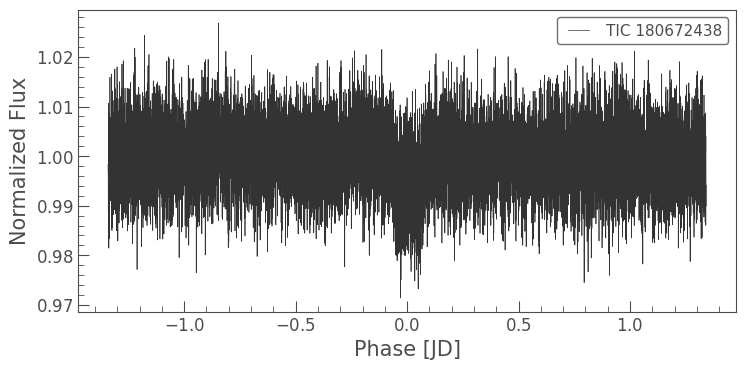

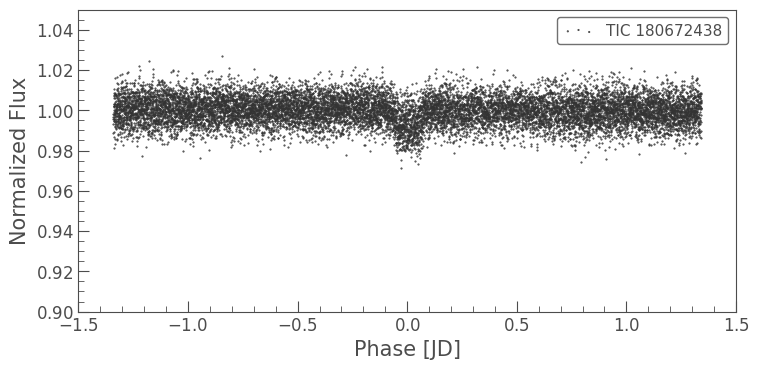

In [14]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
period = 2.6814814814814816
epoch_time =  2642.6768652559517
folded_lc = masked_lc.fold(period, epoch_time=epoch_time)
folded_lc.plot();
folded_lc.scatter(s=1);
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.5,1.5)
plt.ylim([0.9,1.05])

(0.9, 1.05)

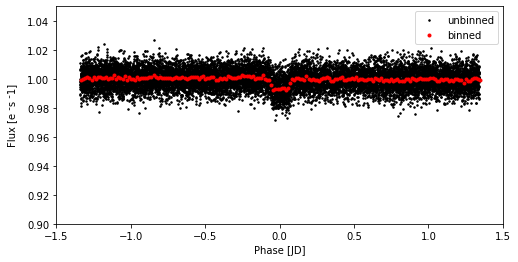

In [15]:
period  = period
t0 = epoch_time

folded2_lc = masked_lc.fold(period, epoch_time=epoch_time)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/15)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.5,1.5)
plt.ylim([0.9,1.05])

In [16]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.9920302033424377
median flux = 1.0000842809677124
Tdepth =  0.008054077625274658
Tdepth in ppm =  8054.077625274658 ppm
Rp/Rs ratio =  0.08974451306500392


In [17]:
planet_b_period = period
planet_b_t0 = epoch_time
planet_b_dur = bls.duration[1]
print(planet_b_period)
print(planet_b_t0)
print(planet_b_dur)

2.6814814814814816
2642.6768652559517
0.33 d


In [18]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 7.92 d hours


In [19]:
#Transit depth from bls model
planet_b_depth = bls.depth[1]
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.00019921482737714
depth in ppm = 199.21482737713998 ppm


In [20]:
P = planet_b_period * 24 * 60 * 60  # planet's period
G = 6.674 * 10 ** -11  # gravitational constant
Msun = 1.98847 * 10 ** 30  # Sun mass
M = 1.08 * Msun  # Star's mass
pi = math.pi
a = ((P ** 2) / ((4 * pi ** 2) / (G * M))) ** (1 / 3)  # Orbital radius or semi-major axis
au = a / 1000 * 0.000000006684587  # Orbital Radius AU
AKM = a / 1000  # Orbital Radius KM
print('Orbital Radius')
print('a =', a, 'm')
print('a =', AKM, 'km')
print('a =', au, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 5797607156.982029 m
a = 5797607.156982029 km
a = 0.03875460943266903 AU
The planetary mass was neglected


In [21]:
L = 1.217183 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')
if au <= ri and au >= ro:
    print("In the Habitable Zone")
else:
    print("Not in the Habitable Zone")

The inner boundary of the habitable zone ri = 1.0519172971293893 AU
The outer boundary of the habitable zone ro = 1.5154443896472107 AU
Not in the Habitable Zone


In [22]:
Rs = 1.0442  #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 65254.871312548494 km
Rp= 10.242484902299246 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 7.973403682821756


In [23]:
P = planet_b_period * 24 * 60 * 60
pi = math.pi
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 157231.69935060732 m/s


In [24]:
print('Period = ',planet_b_period)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')
print('BJD = ',epoch_time +2457000)

Period =  2.6814814814814816
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  3.5999999999999996 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  0.008054077625274658
Transit depth in ppm =  8054.077625274658 ppm
Transit Depth from bls model in ppm = 199.21482737713998 ppm
Rp/Rs ratio =  0.08974451306500392
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 65254.871312548494 km
Rp= 10.242484902299246 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5797607156.982029 m
a = 5797607.156982029 km
a = 0.03875460943266903 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 7.973403682821756
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 157231.69935060732 m/s
- - - - - - - - - - - - - - - - - - - - 
BJD =  2459642.676865256


In [25]:
import cmath
import math

# Assuming period, Tdepth, Rs, Rsun, a, and planet_b_dur are defined elsewhere in your code

# Function to convert degrees to radians
def deg_to_rad(deg):
    return deg * (math.pi / 180)

# Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (0.15 ** 2)) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')

# Calculation of the impact parameter b for eccentricity e=0
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(0.15 /Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (0.15 /Tt)**(2) ))
print('Impact parameter b =', b)

# Calculation of inclination
arg = b * (Rs * Rsun) / (a / 1000)
if abs(arg) <= 1:
    i = cmath.acos(arg)
    print('Inclination i =', 90 - cmath.degrees(i), 'deg')

    # Convert inclination to radians
    angle_in_radians = deg_to_rad(90 - cmath.degrees(i))
    print('Inclination in radians =', angle_in_radians)
else:
    print("Error: Inclination calculation resulted in a complex number.")




Total transit duration T14 Tt = 0.16313699025425937
Tt in hours = 3.915287766102225 hours
Impact parameter b = 0.05094133524900337


AttributeError: module 'cmath' has no attribute 'degrees'

In [26]:
#Astroseimology

In [27]:
import lightkurve as lk
import numpy as np
%matplotlib inline

In [28]:
search_result = lk.search_lightcurve('TIC 91961',sector=(11),author="SPOC")
lc = search_result.download_all().stitch()

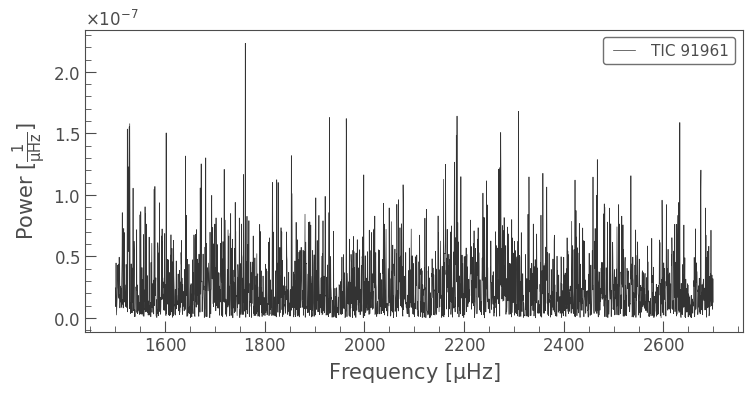

In [29]:
pg = lc.to_periodogram(normalization='psd',
                       minimum_frequency=1500,
                       maximum_frequency=2700)
ax = pg.plot();

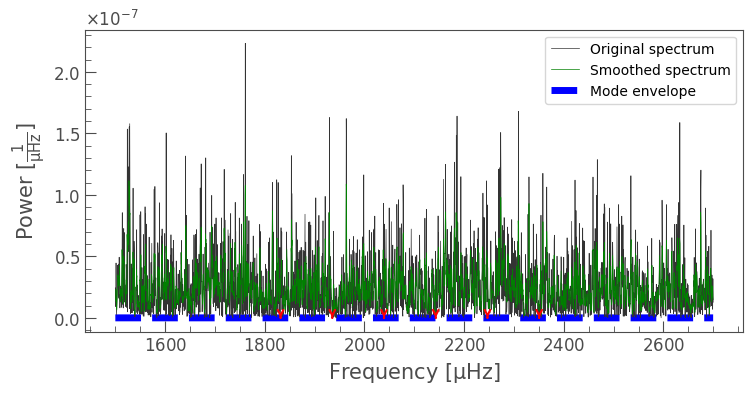

In [30]:
# Plot a smoothed version of the power spectrum on top in green
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# Highlight the "mode envelope" using a Gaussian curve
f = pg.frequency.value
ax.plot(f, 5e-11*np.exp(-(f-2100)**2/(2*230**2)),
        lw=5, ls='--', zorder=0,
        color='blue', label='Mode envelope');

# Annotate the modes using red arrows
for i in range(6):
  ax.annotate('',
              xy=(1831.66+i*103.8, 5.2e-11),
              xytext=(1831.66+i*103.8, 7e-11),
              arrowprops=dict(arrowstyle='->',
              color='red',
              linewidth=1.5))
ax.legend();

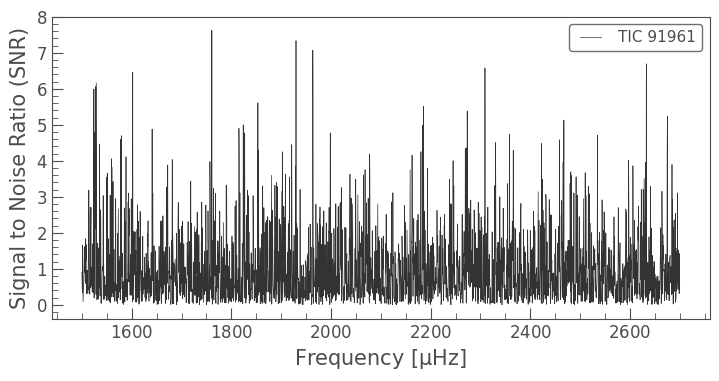

In [31]:
snr = pg.flatten()
ax = snr.plot();

In [32]:
seismology = snr.to_seismology()

In [33]:
seismology.estimate_numax()

numax: 1875.00 uHz (method: ACF2D)

In [34]:
seismology.numax.value

1875.0

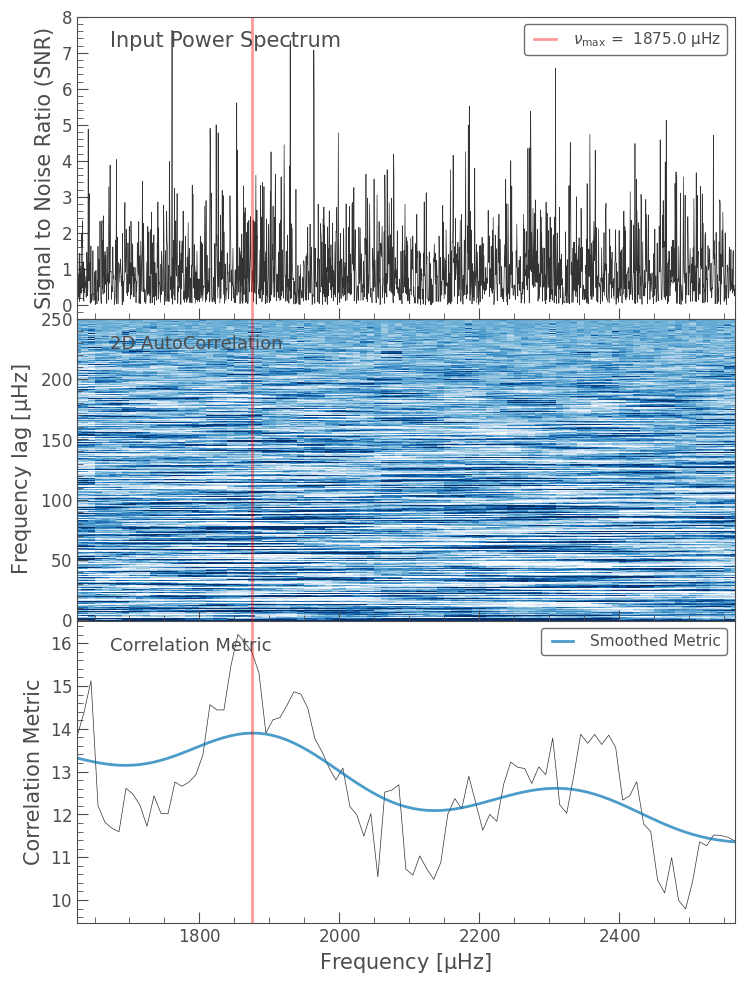

In [35]:
seismology.diagnose_numax();

In [36]:
seismology.estimate_deltanu();
seismology.diagnose_deltanu();

C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\seismology\utils.py:149: RuntimeWarning: Mean of empty slice
  p_sel -= np.nanmean(p_sel)  # Make it so that the selection has zero mean.


ValueError: first array argument cannot be empty

In [37]:
seismology.estimate_mass()

AttributeError: You need to call `Seismology.estimate_deltanu()` first.

In [ ]:
seismology.estimate_radius()

In [ ]:
seismology.estimate_logg()

In [ ]:
seismology

In [38]:
#False Positive Checkeer
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

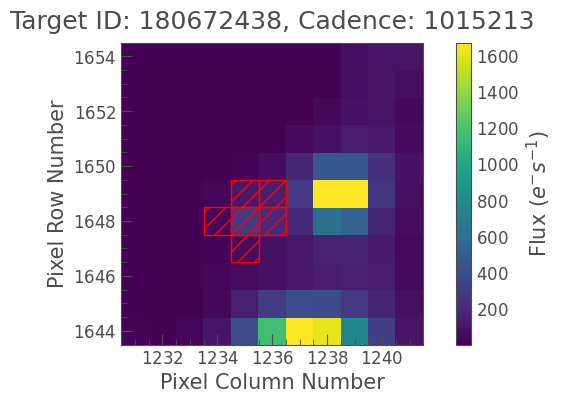

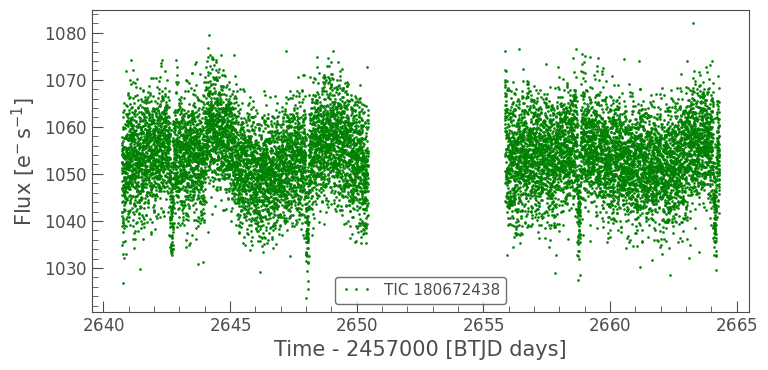

In [39]:
search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector=49)
tpf = search_result[0].download()
%matplotlib inline
tpf.plot(aperture_mask='pipeline')
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 49)
%matplotlib inline
lc = sector_data.download()


lc.plot(linewidth = 0, marker = '.', color = 'green', alpha = 0.9)

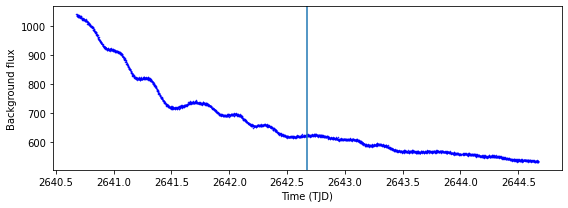

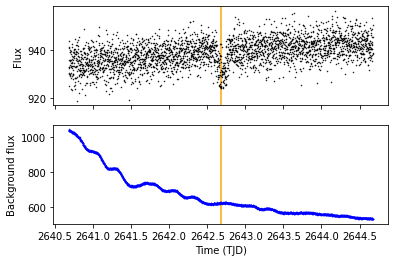

In [40]:
###Check the Background Flux at the Time of Transit###
######################################################
transit_time = epoch_time

# generate a mask so that we only see the times around the transit event
# in this example we are looking at 2 days on either side of the event but you can CHANGE THIS depending on the signal.
transit_mask = (lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2)

# generate the figure
fig, ax = plt.subplots(figsize = (8,3))

# mask the date (both the time and the flux using the mask we just generated)
plt.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

plt.axvline(transit_time) # plot a vertical line at the time of the transit event!

plt.ylabel("Background flux") # label the axes
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

# define a plotting region with two parts
fig, ax = plt.subplots(2,1, sharex = True)

#plot the flux on the first axes and the background flux on the second
#crop both data sets using the mask that we defined in the cell above
ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'k', lw = 0, marker = '.', ms = 1)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

#plot a line at the time of the transit event on both plots
ax[0].axvline(transit_time, color = 'orange', zorder = -1)
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux")
ax[1].set_ylabel("Background flux")
ax[1].set_xlabel("Time (TJD)")
plt.show()

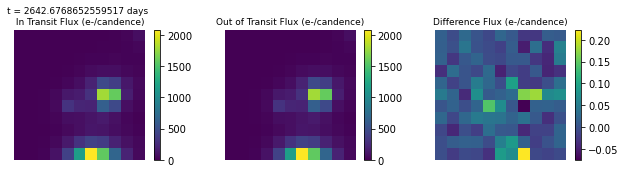

In [41]:
def plot_in_out_TPF(tpf,  T0):

    tpf_list = [tpf.flux.value]
    t_list = [tpf.time.value]
    T0_list = [T0]
    
    plt.figure(figsize=(9,2.5*len(T0_list)))

    plt.tight_layout()

    count = 0 # keep track of how many images have been plotted to that they appear on a subgrid of plots which has three columns

    # loop through all of the list of PCA corrected flux vs time arrays for each marked transit-event
    for idx, tpf_filt in enumerate(tpf_list): # idx is for each maked transit-event

        T0 = T0_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        img_intr = tpf_filt[intr,:,:].sum(axis=0)/float(intr.sum()) # apply the masks and normalize the flux
        img_oot = tpf_filt[oot,:,:].sum(axis=0)/float(oot.sum())
        img_diff = img_oot-img_intr # calculate the diffefence image (out of transit minus in-transit)

        
        # ---- PLOT -------

        # in transit
        count += 1 # add to the count before each plot
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_intr, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("t = {} days \n In Transit Flux (e-/candence)".format(T0), fontsize = 9 )

        # out of transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_oot, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Out of Transit Flux (e-/candence)", fontsize = 9 )

        # out of transit minus in-transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_diff, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Difference Flux (e-/candence)", fontsize = 9 )


    plt.subplots_adjust(wspace = 0)
    plt.tight_layout()

#plot the test for a given target
plot_in_out_TPF(tpf, transit_time)


done.



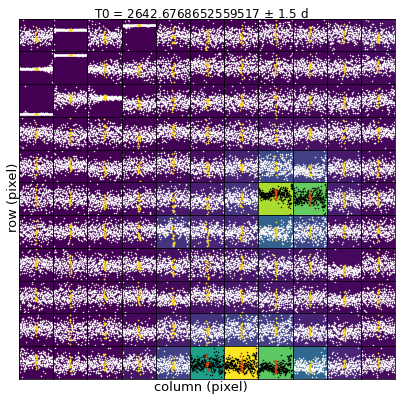

In [42]:
def plot_pixel_level_LC(tpf, transit_time, ql = False):
    
    transit_list = [transit_time]
    t_list = [tpf.time.value]
    tpf_list = [tpf.flux.value]
    bkg_list = [np.nanmean(tpf.flux.value,axis = 0)]
    arrshape_list = [tpf.flux.shape]

    # loop through the transits and make plot for each ( only the first is currently displayed in the pdf report)
    for idx, X1_original in enumerate(tpf_list):

        bkg = np.flip(bkg_list[idx], axis = 0)
        arrshape = arrshape_list[idx]
        peak = transit_list[idx]
        tpf = tpf_list[idx]
        
        s = X1_original.shape
        X1 = X1_original.reshape(s[0],s[1]*s[2])
        
        T0 = transit_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        

        fig, ax = plt.subplots(arrshape[1], arrshape[2], sharex = True, sharey = False, gridspec_kw={'hspace': 0 ,'wspace': 0}, figsize=(5.5,5.5))

        plt.tight_layout()

        # see if the backrgound of this plot can be the average pixel flux (if there are too many nans this will fail and the background will just be black which is also okay)
        try:
            color = plt.cm.viridis(np.linspace(0, 1,int(np.nanmax(bkg))-int(np.nanmin(bkg))+1))
            simplebkg = False
        except:
            simplebkg = True

        for i in range(0,arrshape[1]):
            ii = arrshape[1]-1-i # we want to plot this such that the pixels increase from left to right and bottom to top

            for j in range(0,arrshape[2]):

                apmask = np.zeros(arrshape[1:], dtype=np.int64)
                apmask[i,j] = 1
                apmask = apmask.astype(bool)
                
                flux = X1[:,apmask.flatten()].sum(axis=1)

                m = np.nanmedian(flux[oot])

                normalizedflux = flux/m

                # bin the data
                f1 = normalizedflux
                time = t


                binfac = 7

                N       = len(time)
                n       = int(np.floor(N/binfac)*binfac)
                X       = np.zeros((2,n))
                X[0,:]  = time[:n]
                X[1,:]  = f1[:n]
                Xb      = rebin(X, (2,int(n/binfac)))

                # binned data
                time_binned    =    np.array(Xb[0])
                flux_binned    =   np.array(Xb[1])

                
                # create a mask that only looks at the times cut around the transit-event
                timemask = (time_binned < peak+1.5) & (time_binned > peak-1.5)


                time_binned = time_binned[timemask]
                flux_binned = flux_binned[timemask]

                # ----------
                # fit a spline to the cut-out of each pixel LC in order to flatten it
                p = np.poly1d(np.polyfit(time_binned, flux_binned, 3))
                flux_binned = flux_binned/p(time_binned)
                # ----------

                intr = abs(peak-time_binned) < 0.1

                if simplebkg == True:
                    ax[ii, j].set_facecolor(color = 'k')
                    linecolor = 'w'
                    transitcolor = 'gold'
                else:
                    ax[ii, j].set_facecolor(color = color[int(bkg[ii,j])-int(np.nanmin(bkg))])

                    if int(bkg[ii,j])-abs(int(np.nanmin(bkg))) > ((np.nanmax(bkg))-abs(int(np.nanmin(bkg))))/2:
                        linecolor = 'k'
                        transitcolor = 'orangered'
                    else:
                        linecolor = 'w'
                        transitcolor = 'gold'


                ax[ii, j].plot(time_binned,flux_binned, color = linecolor, marker = '.', markersize=1, lw = 0)
                ax[ii, j].plot(time_binned[intr],flux_binned[intr], color = transitcolor, marker = '.', markersize=1, lw = 0)

                # get rid of ticks and ticklabels
                ax[ii,j].set_yticklabels([])
                ax[ii,j].set_xticklabels([])
                ax[ii,j].set_xticks([])
                ax[ii,j].set_yticks([])

        # ------------------

        print ("done.\n")
        # ------------------

        # label the pixels

        fig.text(0.5,0.01, "column (pixel)", ha='center', fontsize = 13)
        fig.text(0.01, 0.5, "row (pixel)", va='center', rotation='vertical', fontsize = 13)

        # - - - - - - - - - -

        plt.subplots_adjust(top=0.95, right = 0.99, bottom = 0.04, left = 0.04)

        plt.suptitle(r"T0 = {} $\pm$ 1.5 d".format(peak ),y=0.98, fontsize = 12)
        plt.xlim(peak-1.5,peak+1.5)
        plt.show()
        
        
def rebin(arr,new_shape):

    ''''
    function used to rebin the data
    '''
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
        new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

plot_pixel_level_LC(tpf, transit_time)

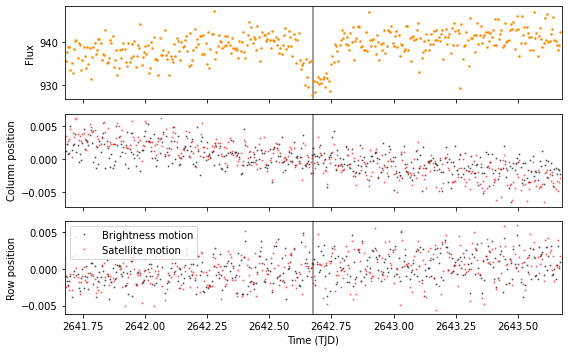

In [43]:
def plot_centroids(lc, transit_time=None, window=None):
        
    # bin the data 
    lc_bin = lc.bin(7/60/24)
    
    # generate a mask so that we only see the times around the transit event
    if (window == None) or (transit_time == None):
        transit_mask = lc_bin.time.value > 0
    else:
        transit_mask = (lc_bin.time.value > transit_time - window) & (lc_bin.time.value < transit_time + window)
        
    # make a plot with three panels so that we can see the lightcurve and the centroid positions 
    fig, ax = plt.subplots(3,1, figsize = (8,5), sharex= True)
    
    # plot the lightcurve in the top panel (in orange) 
    ax[0].plot(lc_bin.time.value[transit_mask], lc_bin.sap_flux.value[transit_mask], color = 'darkorange', lw = 0, marker = '.', ms = 3)
    
    # plot the centroid motions in the column direction in the middle panel
    ax[1].plot(lc_bin.time.value[transit_mask], lc_bin.mom_centr1.value[transit_mask]-np.nanmean(lc_bin.mom_centr1.value[transit_mask]), color = 'black', lw = 0, marker = '.', ms = 2, alpha = 0.5)
    ax[1].plot(lc_bin.time.value[transit_mask], lc_bin.pos_corr1.value[transit_mask]-np.nanmean(lc_bin.pos_corr1.value[transit_mask]), color = 'red', lw = 0, marker = '.', ms = 2, alpha = 0.5)
    
    # plot the centroid motions in the row direction in the middle panel
    ax[2].plot(lc_bin.time.value[transit_mask], lc_bin.mom_centr2.value[transit_mask] - np.nanmedian(lc_bin.mom_centr2.value[transit_mask]), color = 'black', lw = 0, marker = '.', ms = 2, alpha = 0.5, label = 'Brightness motion')
    ax[2].plot(lc_bin.time.value[transit_mask], lc_bin.pos_corr2.value[transit_mask]- np.nanmedian(lc_bin.pos_corr2.value[transit_mask]), color = 'red', lw = 0, marker = '.', ms = 2, alpha = 0.5, label = 'Satellite motion')
    
    if (transit_time != None):
        # draw a vertical line at the time of the transit event 
        ax[0].axvline(transit_time, color = 'grey', zorder = -1)
        ax[1].axvline(transit_time, color = 'grey', zorder = -1)
        ax[2].axvline(transit_time, color = 'grey', zorder = -1)
    
    # label the axes
    ax[0].set_ylabel("Flux")
    ax[1].set_ylabel("Column position")
    ax[2].set_ylabel("Row position")
    plt.xlabel("Time (TJD)")
    
    if (window != None) and (transit_time != None):   
        plt.xlim(transit_time - window, transit_time + window)
        
    plt.tight_layout()
    plt.legend()
    plt.show()

# cut out region 
window = 1 
plot_centroids(lc, transit_time, window=window)

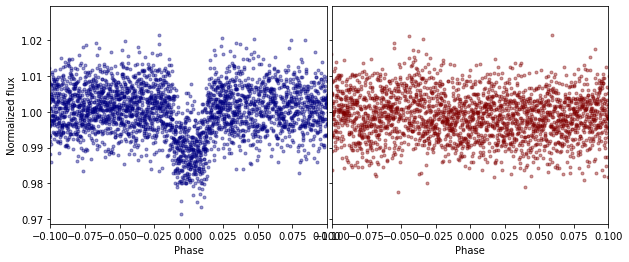

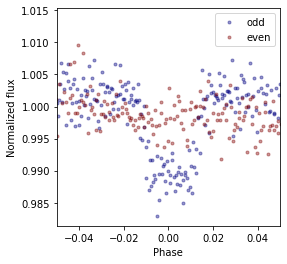

In [44]:
def odd_even_phase(lc, period, t0, plot_size = False, same_axes = False, binning = False):
    
    lc = lc.normalize()
    
    if binning != False:
        lc = lc.bin(binning/60/24) # you can change the binning factor here if you like
    time = lc.time.value
    flux = lc.flux.value
    
    t0_odd = t0
    t0_even = t0 + period
    period = period*2
    
    phase_odd = np.array([-0.5+( ( t - t0_odd-0.5*period) % period) / period for t in time])
    phase_even = np.array([-0.5+( ( t - t0_even-0.5*period) % period) / period for t in time])

    if same_axes == False:
        fig, ax = plt.subplots(1,2, figsize = (10,4), sharey = True)
        
        ax[0].plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4)
        ax[1].plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4)
        
        ax[0].set_xlabel("Phase")
        ax[0].set_ylabel("Normalized flux")
        ax[1].set_xlabel("Phase")
        
        ax[0].annotate("ODD", (0.3, np.nanmin(flux)), fontsize = 14)
        ax[1].annotate("EVEN", (0.3, np.nanmin(flux)), fontsize = 14)
    
        plt.subplots_adjust(wspace=0.02)
        
        if plot_size != False:
            ax[0].set_xlim(-plot_size, plot_size)
            ax[1].set_xlim(-plot_size, plot_size)
    else:
        fig, ax = plt.subplots(figsize = (4,4))
        
        ax.plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4, label = 'odd')
        ax.plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4, label = 'even')
        
        ax.set_xlabel("Phase")
        ax.set_ylabel("Normalized flux")
        
        plt.legend()
            
        if plot_size != False:
            ax.set_xlim(-plot_size, plot_size)


period = period
t0 = epoch_time

odd_even_phase(lc, period, t0, plot_size = 0.1)
odd_even_phase(lc, period, t0, plot_size = 0.05,  same_axes = True, binning = 15)

In [45]:
lk.show_citation_instructions()